In [1]:
# ============================================
# || import all necessary libraries         ||
# ============================================

import numpy as np
import matplotlib.pyplot as plt
import random
import time
from typing import Dict, List, Tuple, Any
import sys
import os

# Utilities
from utils.data import get_fixed_data
from utils.visualization import plot_results, plot_experiment_results, plot_cost_histogram, compare_policies

# Task 0
## Liv har code som er brugt til de to scenarier

Optimal cost: 339.0


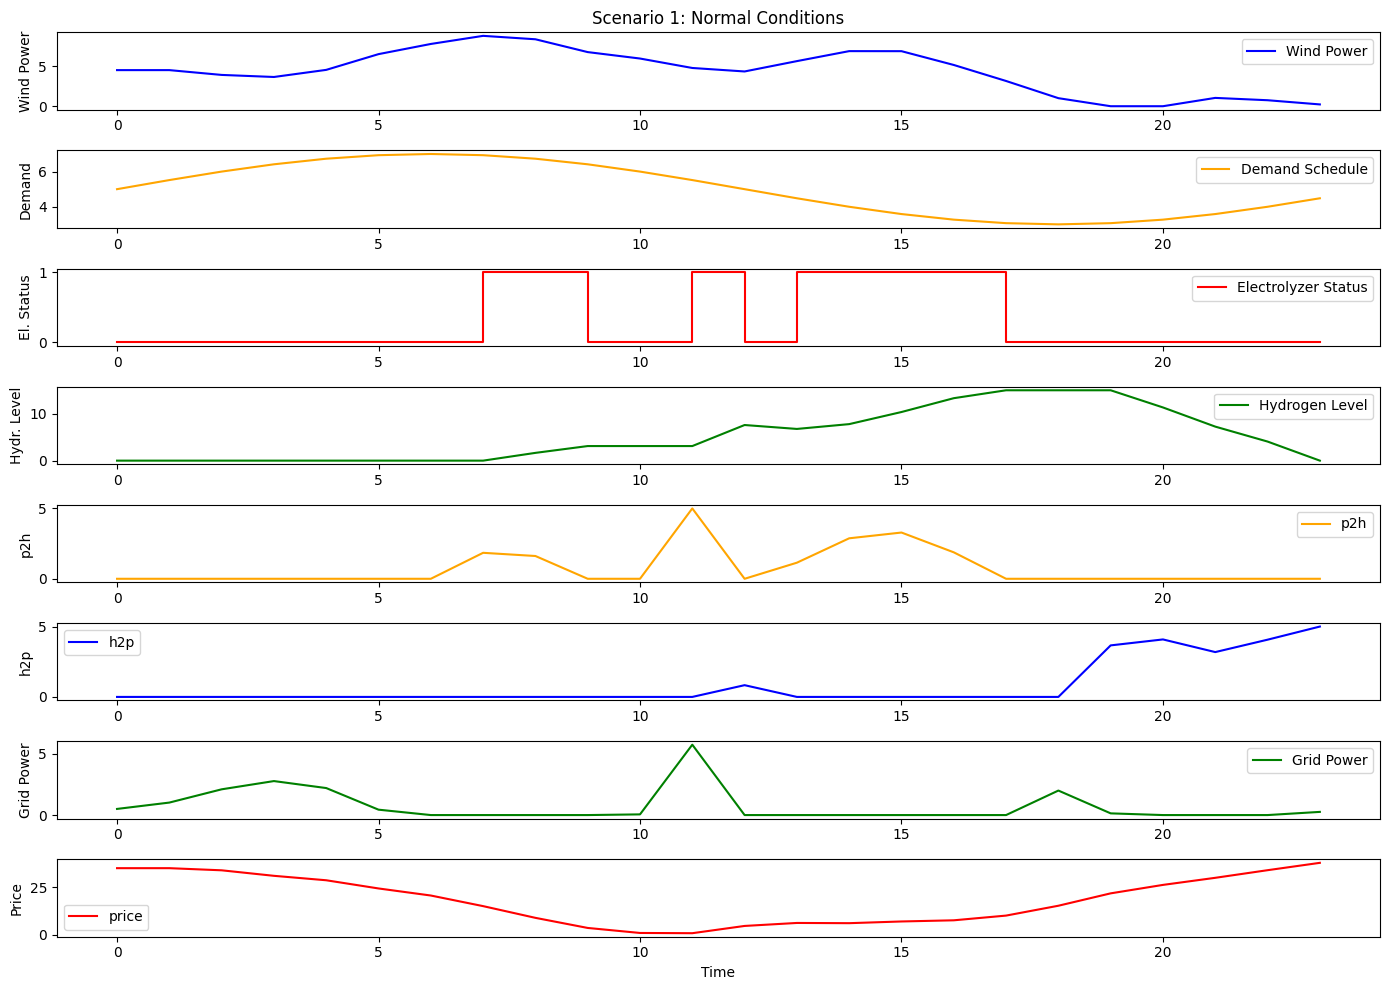

Optimal cost: 0.0


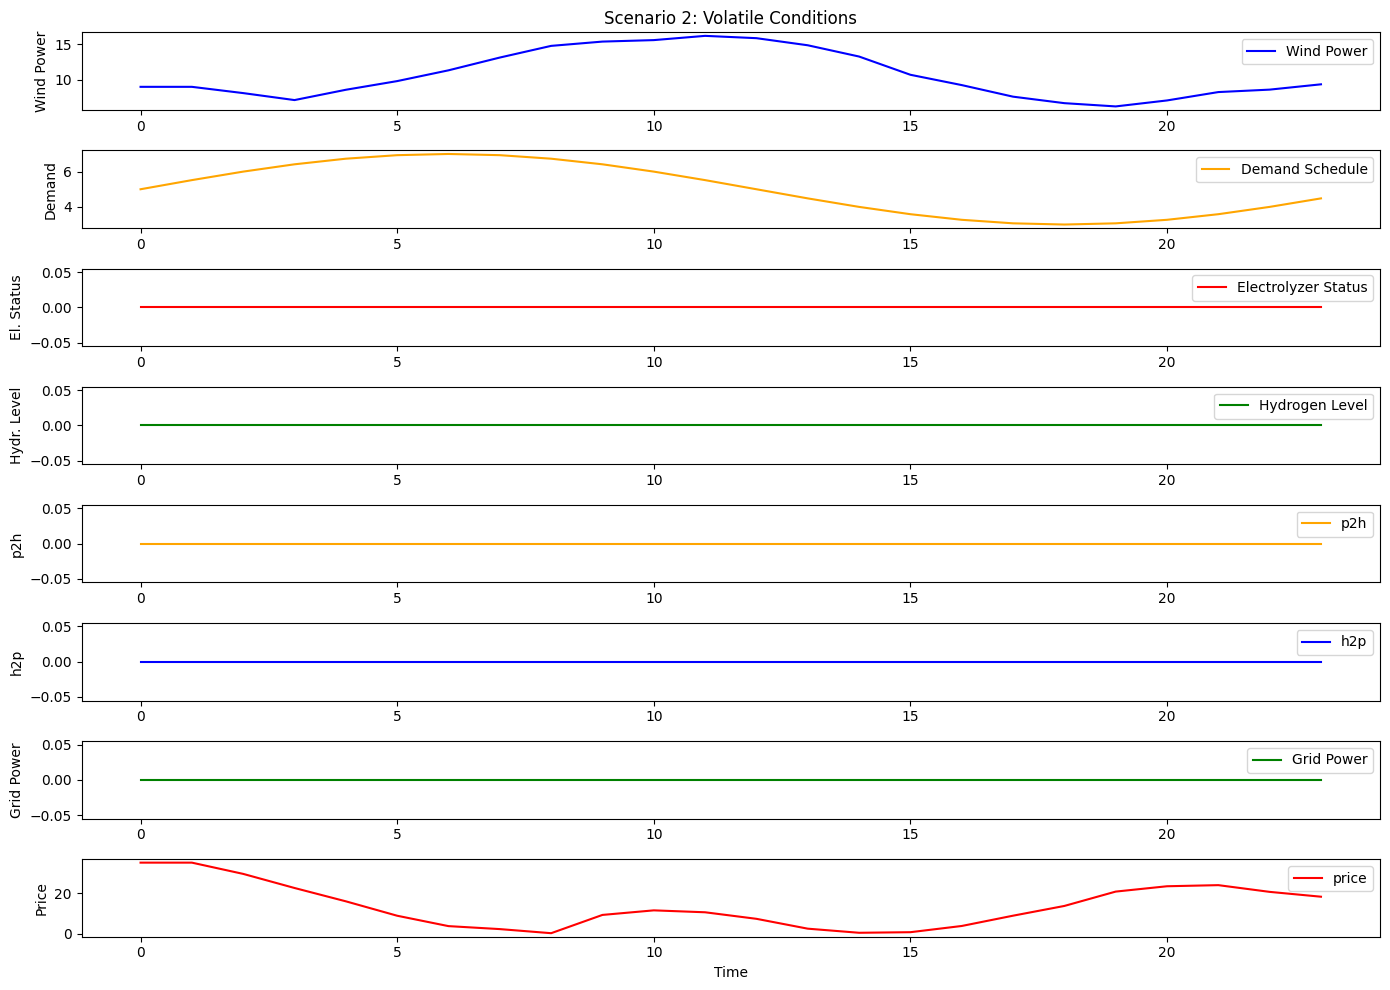

In [7]:
from task_0.helper_functions import generate_trajectories, solve_milp

def main() -> None:
    data = get_fixed_data()
    
    # First scenario - Normal conditions
    wind1, price1 = generate_trajectories(data)
    results1 = solve_milp(wind1, price1, data, False)
    plot_results(wind1, price1, results1, data, "Scenario 1: Normal Conditions")

    # Second scenario - More volatile conditions?
    data_volatile = data.copy()
    data_volatile['target_mean_wind'] = data_volatile['target_mean_wind']*2
    data_volatile['price_reversion_strength'] = data_volatile['price_reversion_strength']*2

    wind2, price2 = generate_trajectories(data_volatile)
    results2 = solve_milp(wind2, price2, data, False)
    plot_results(wind2, price2, results2, data, "Scenario 2: Volatile Conditions")
random.seed(42)
main()

# Task 1

ENERGY HUB MDP EVALUATION

Evaluating Dummy Policy over 20 experiments...
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 615.66
Min cost: 180.97, Max cost: 1271.83
Dummy Policy Results:
Average Cost: 615.66
Min Cost: 180.97
Max Cost: 1271.83
Evaluation Time: 1.01 seconds

Generating visualizations...

Generating visualizations for Dummy Policy...


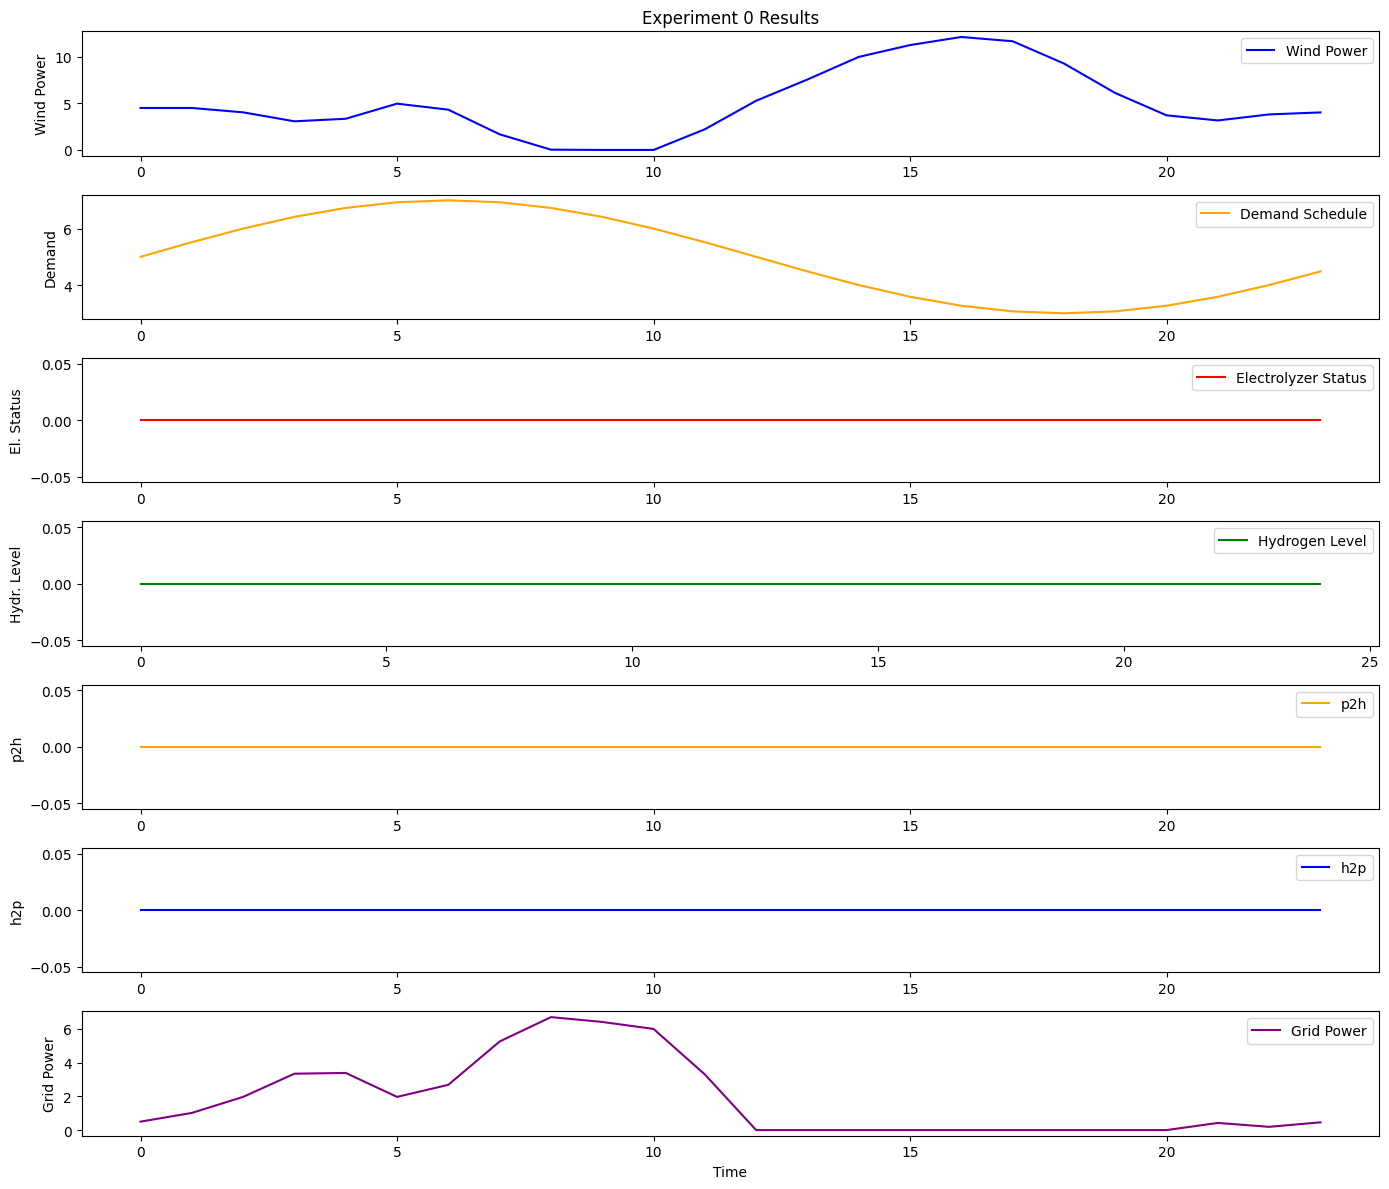

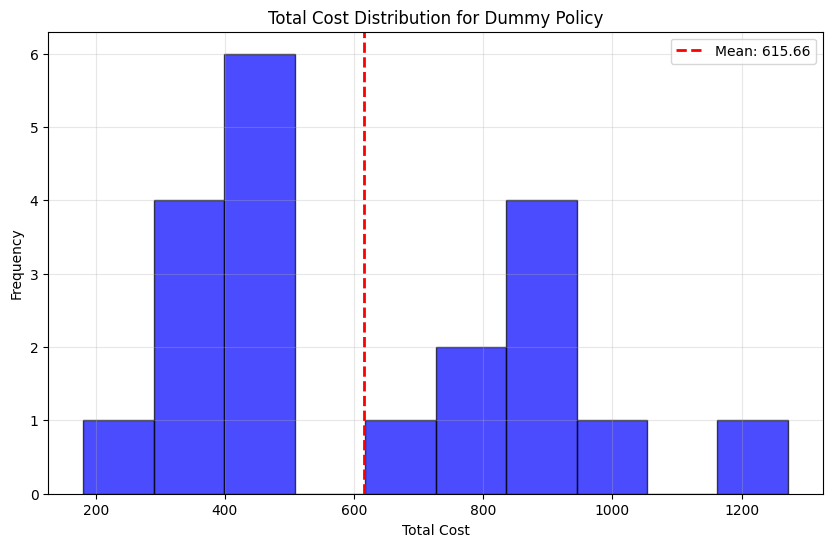

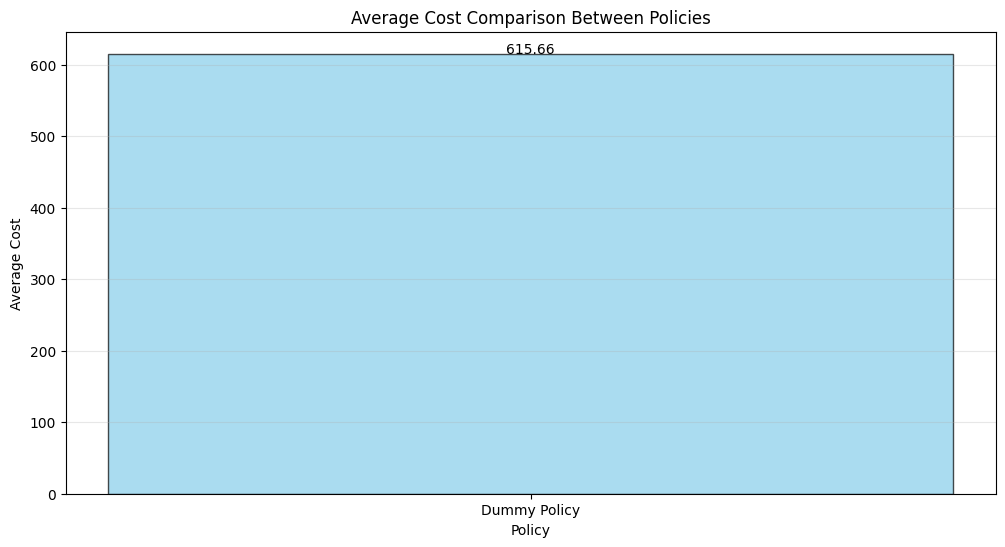


Evaluation completed successfully!


In [5]:
from task_1.evaluation_framework import evaluate_policy
from task_1.energy_hub_policies import dummy_policy
def main():
    data = get_fixed_data()
    
    print("=" * 50)
    print("ENERGY HUB MDP EVALUATION")
    print("=" * 50)
    num_experiments = 20
    policy_results = {}
    policies = {
        "Dummy Policy": dummy_policy
    }
    
    # Evaluate each policy
    for policy_name, policy_func in policies.items():
        print(f"\nEvaluating {policy_name} over {num_experiments} experiments...")
        start_time = time.time()
        
        avg_cost, results = evaluate_policy(policy_func, num_experiments=num_experiments)
        
        elapsed_time = time.time() - start_time
        
        print(f"{policy_name} Results:")
        print(f"Average Cost: {avg_cost:.2f}")
        print(f"Min Cost: {np.min(results['total_costs']):.2f}")
        print(f"Max Cost: {np.max(results['total_costs']):.2f}")
        print(f"Evaluation Time: {elapsed_time:.2f} seconds")
        
        # Store the results
        policy_results[policy_name] = results
    
    print("\nGenerating visualizations...")
    
    for policy_name, results in policy_results.items():
        print(f"\nGenerating visualizations for {policy_name}...")
        
        plot_experiment_results(results, experiment_index=0, data=data) # just the first experiment
        
        plot_cost_histogram(results, policy_name=policy_name) # histogram of total costs over all experiments
    
    # Compare all policies for next task
    compare_policies(policy_results)
    
    print("\nEvaluation completed successfully!")
    
    return policy_results

if __name__ == "__main__":
    policy_results = main()

# Task 2

TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT

--------------------------------------------------
Evaluating: Dummy Policy
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 745.49
Min cost: 87.12, Max cost: 1388.34

Results for Dummy Policy:
Average Cost: 745.49
Min Cost: 87.12
Max Cost: 1388.34
Standard Deviation: 347.51
Evaluation Time: 0.00 seconds

--------------------------------------------------
Evaluating: Expected Value Policy (Horizon=3)
--------------------------------------------------
Processing experiment 0...
Power balance constraint violated: 5.517638087272644 < 5.5176380902050415
DECISION DOES NOT MEET THE CONSTRAINTS FOR EXPERIMENT 0, TIMESLOT 1. THE DUMMY POLICY WILL BE USED INSTEAD
Power balance constraint violated: 3.999999993550934 < 4.0
DECISION DOES NOT MEET THE CONSTRAINTS FOR EXPERIMENT 0, TIMESLOT 14. THE DUMM

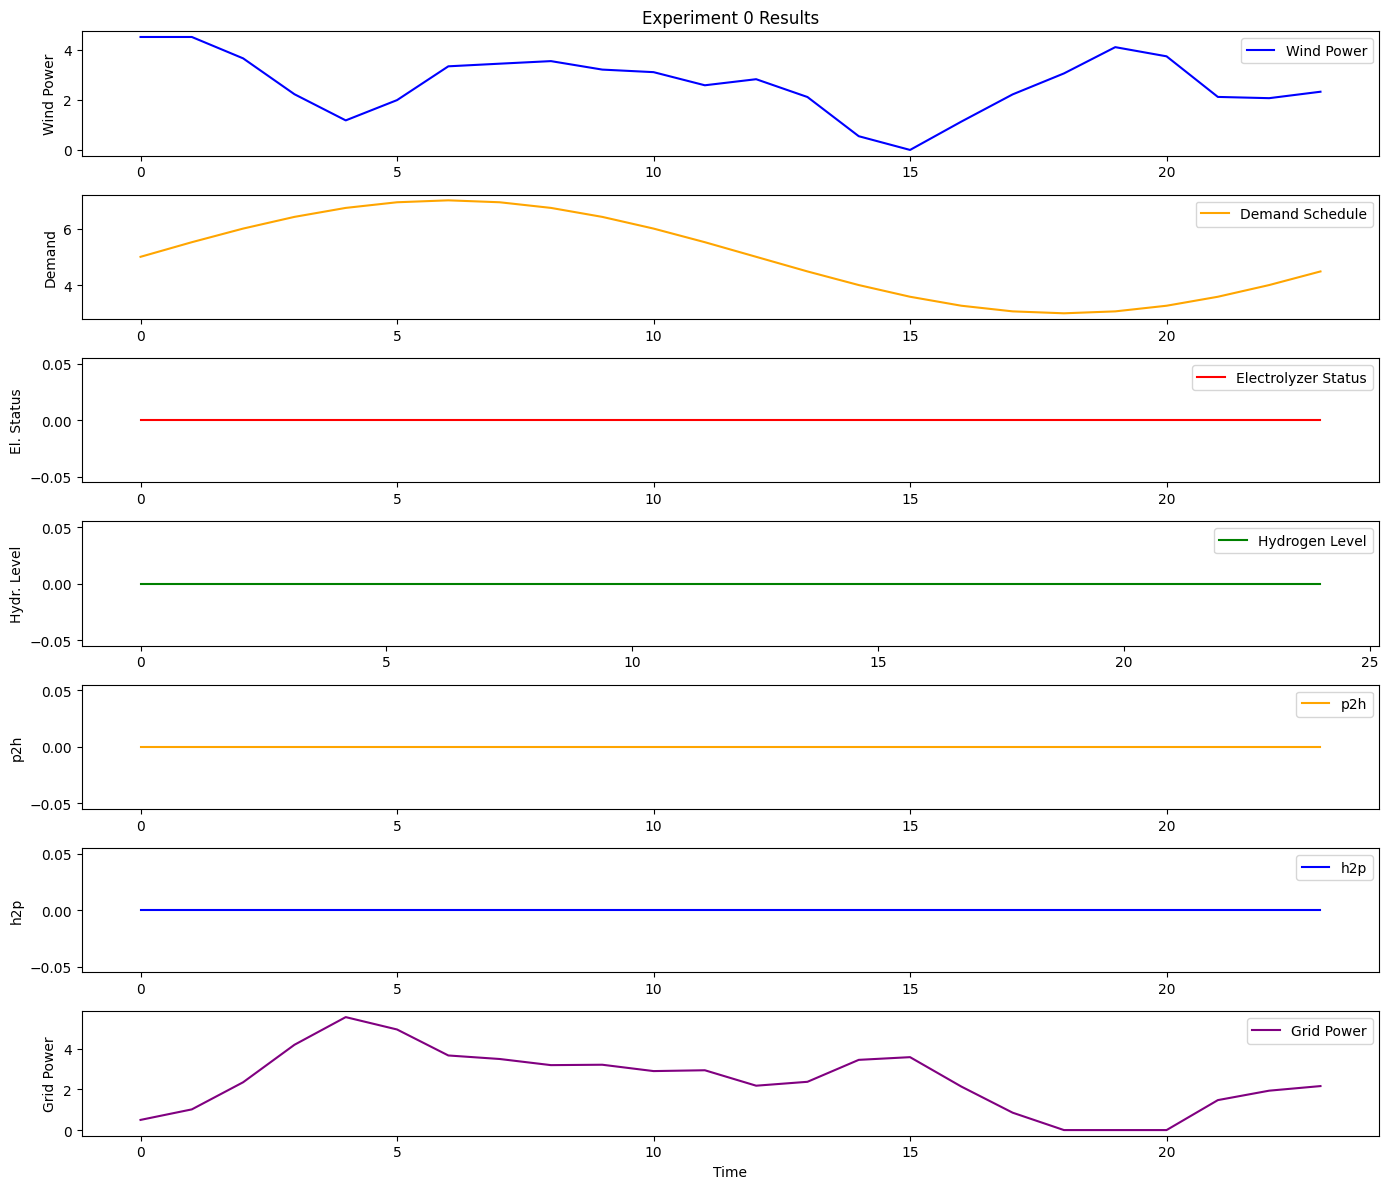

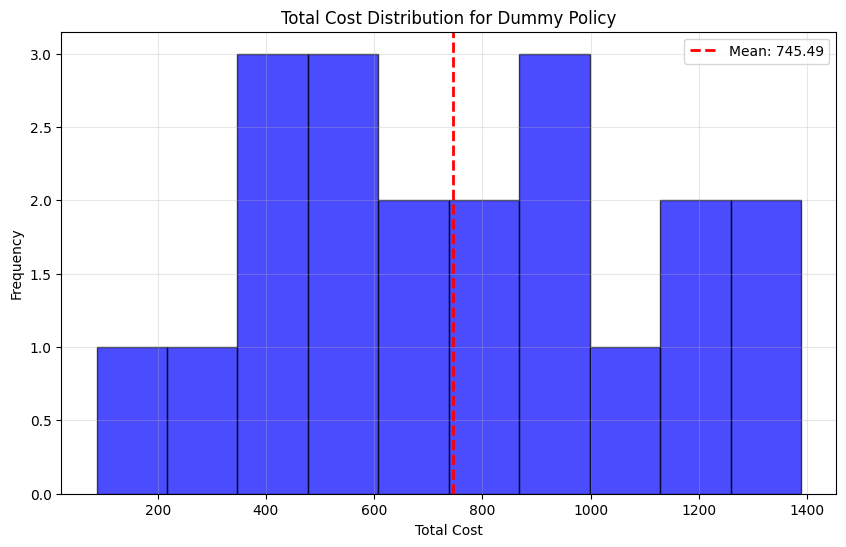


Visualizing results for Expected Value Policy (Horizon=3)...


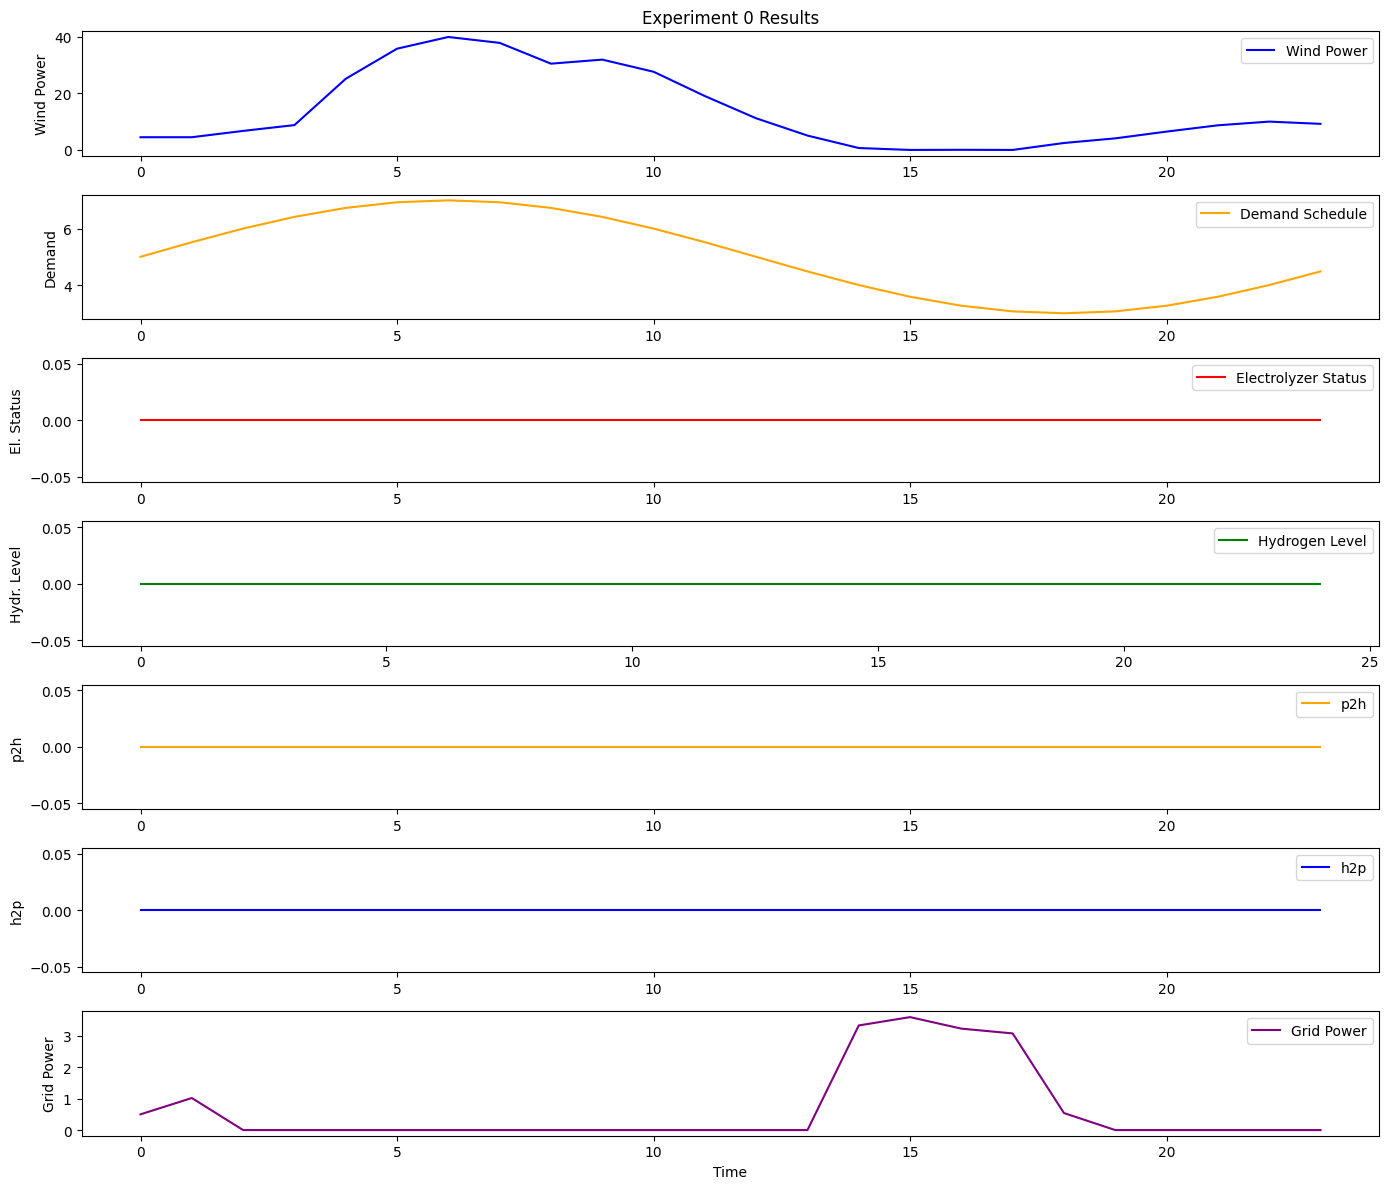

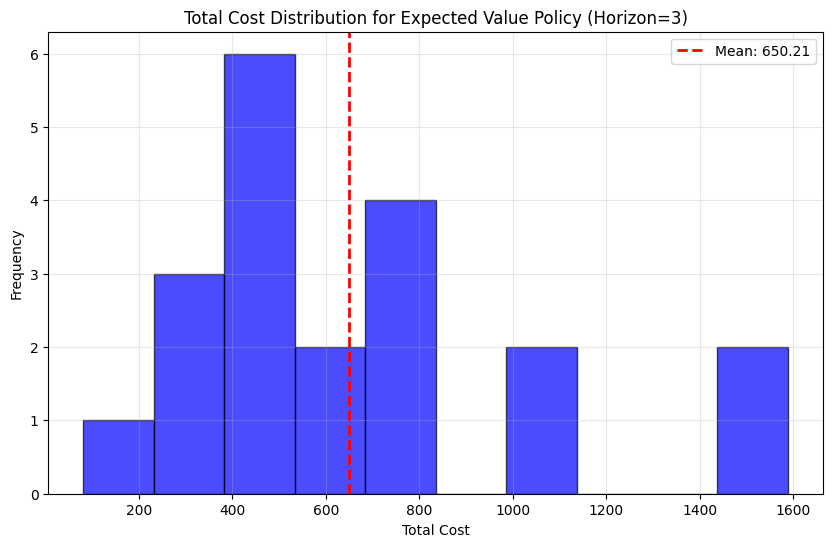


Visualizing results for SP Policy (Horizon=2, Scenarios=10)...


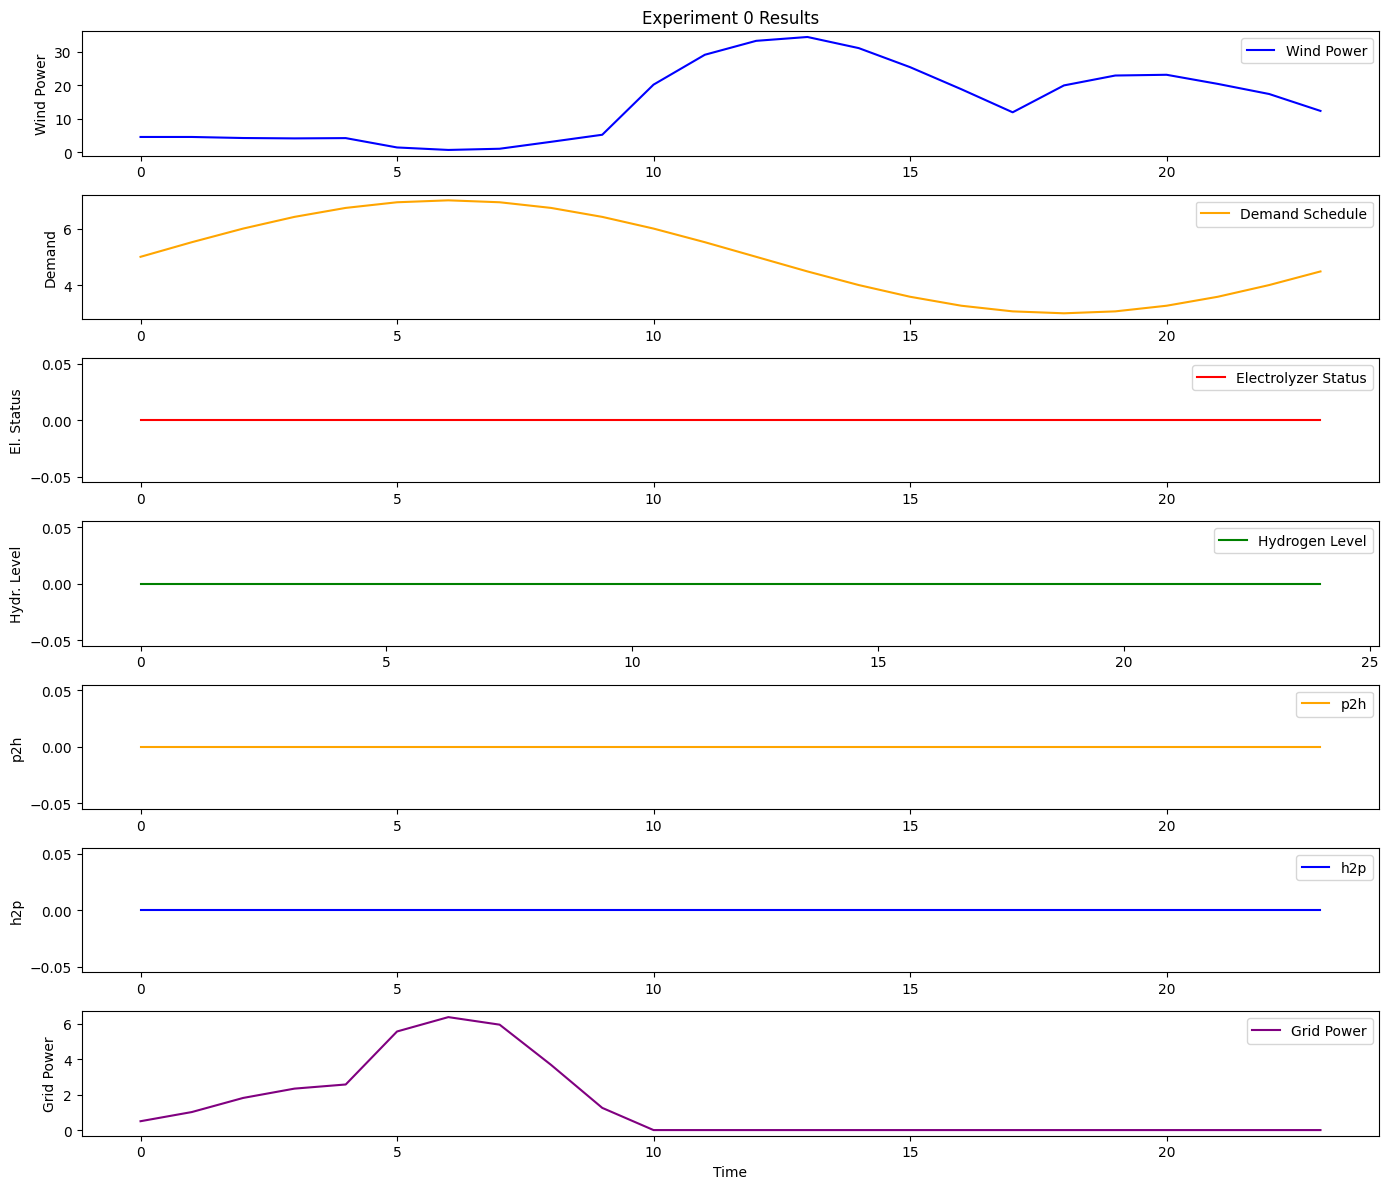

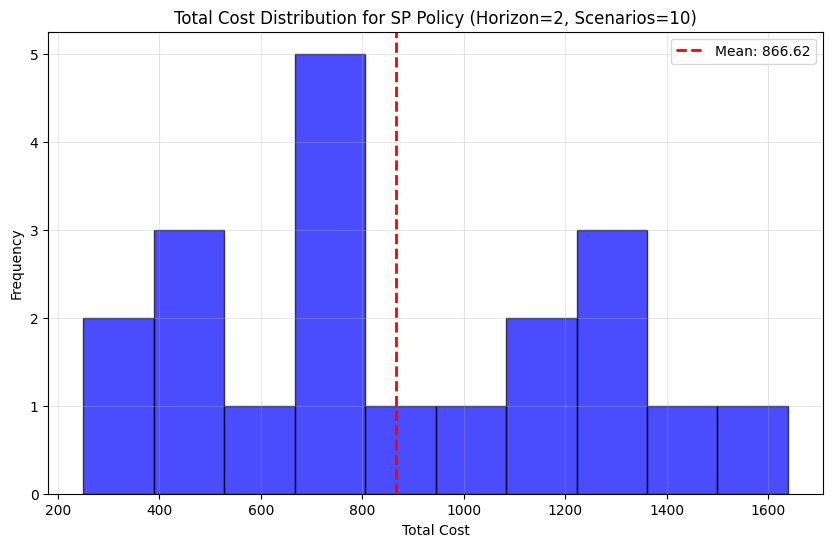


Visualizing results for SP Policy (Horizon=3, Scenarios=6)...


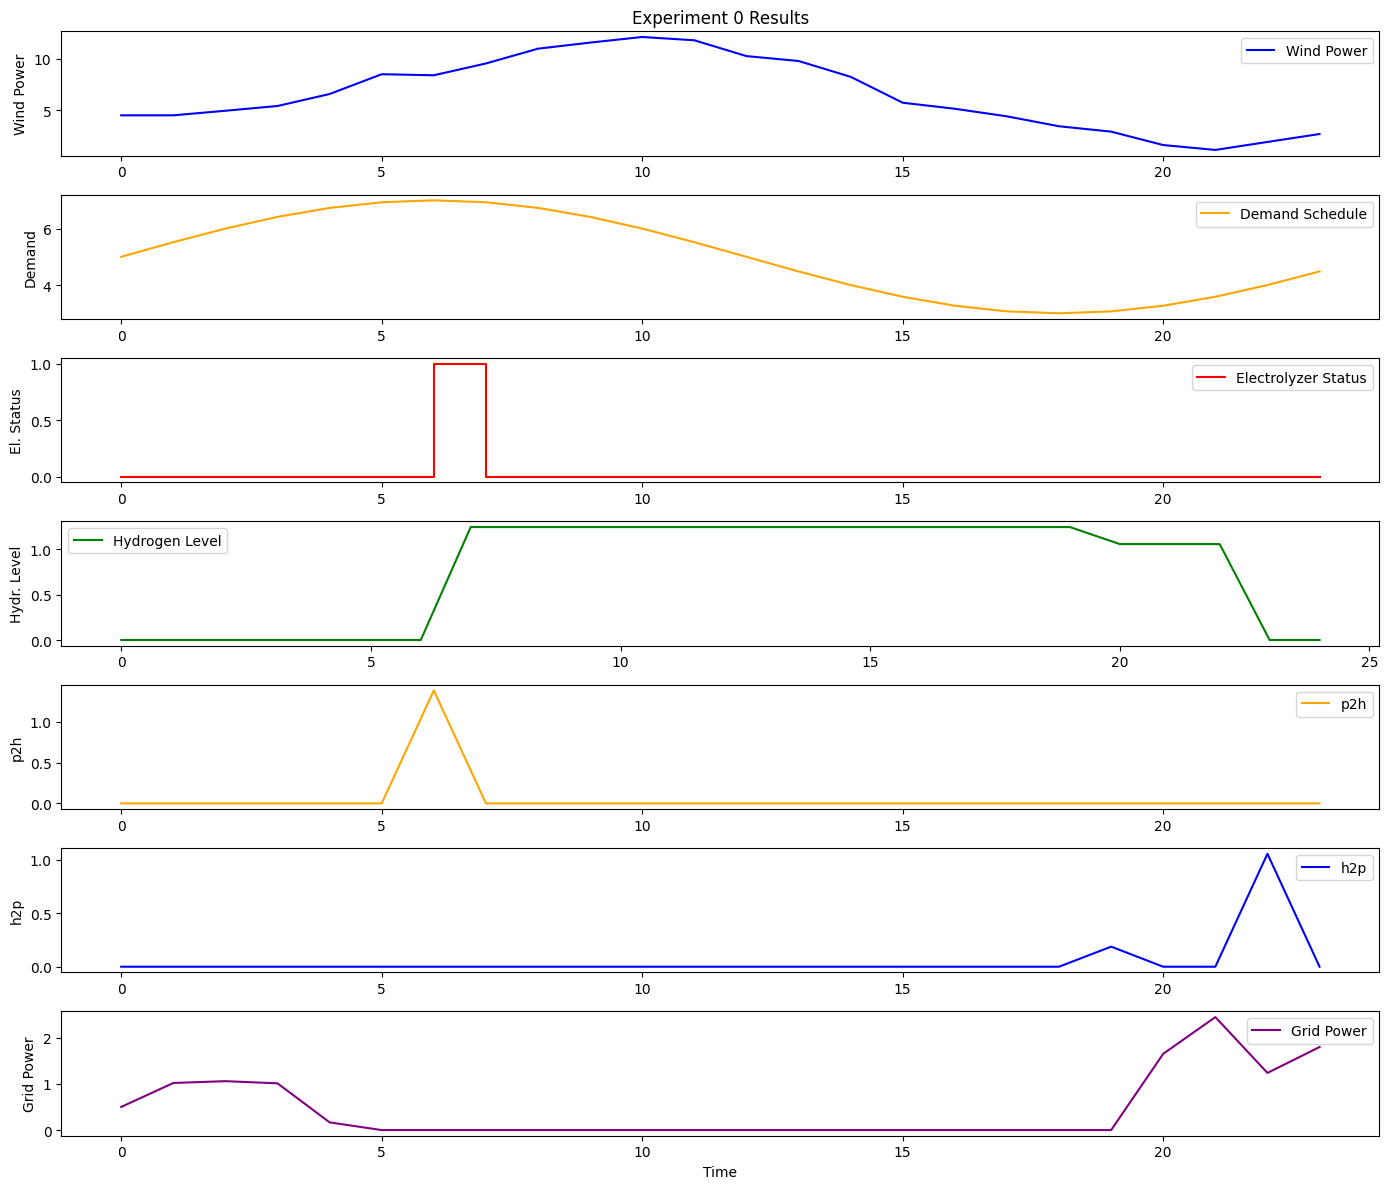

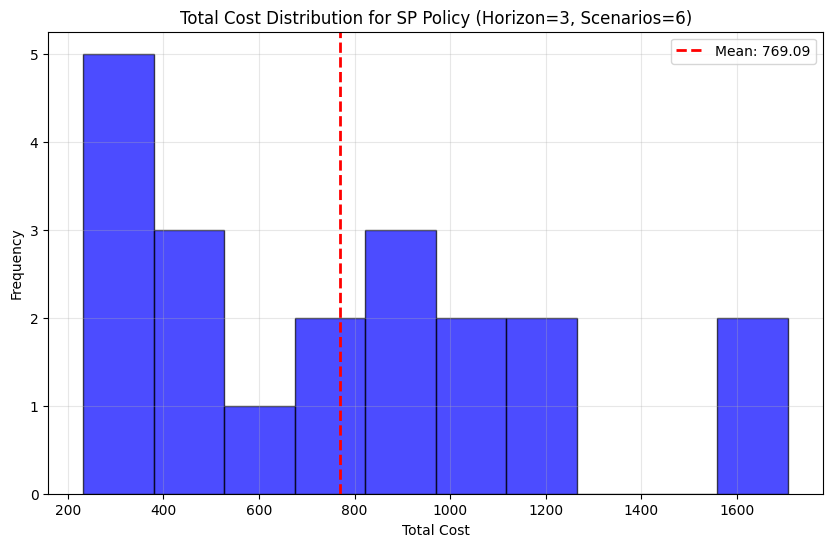


Visualizing results for SP Policy (Horizon=5, Scenarios=4)...


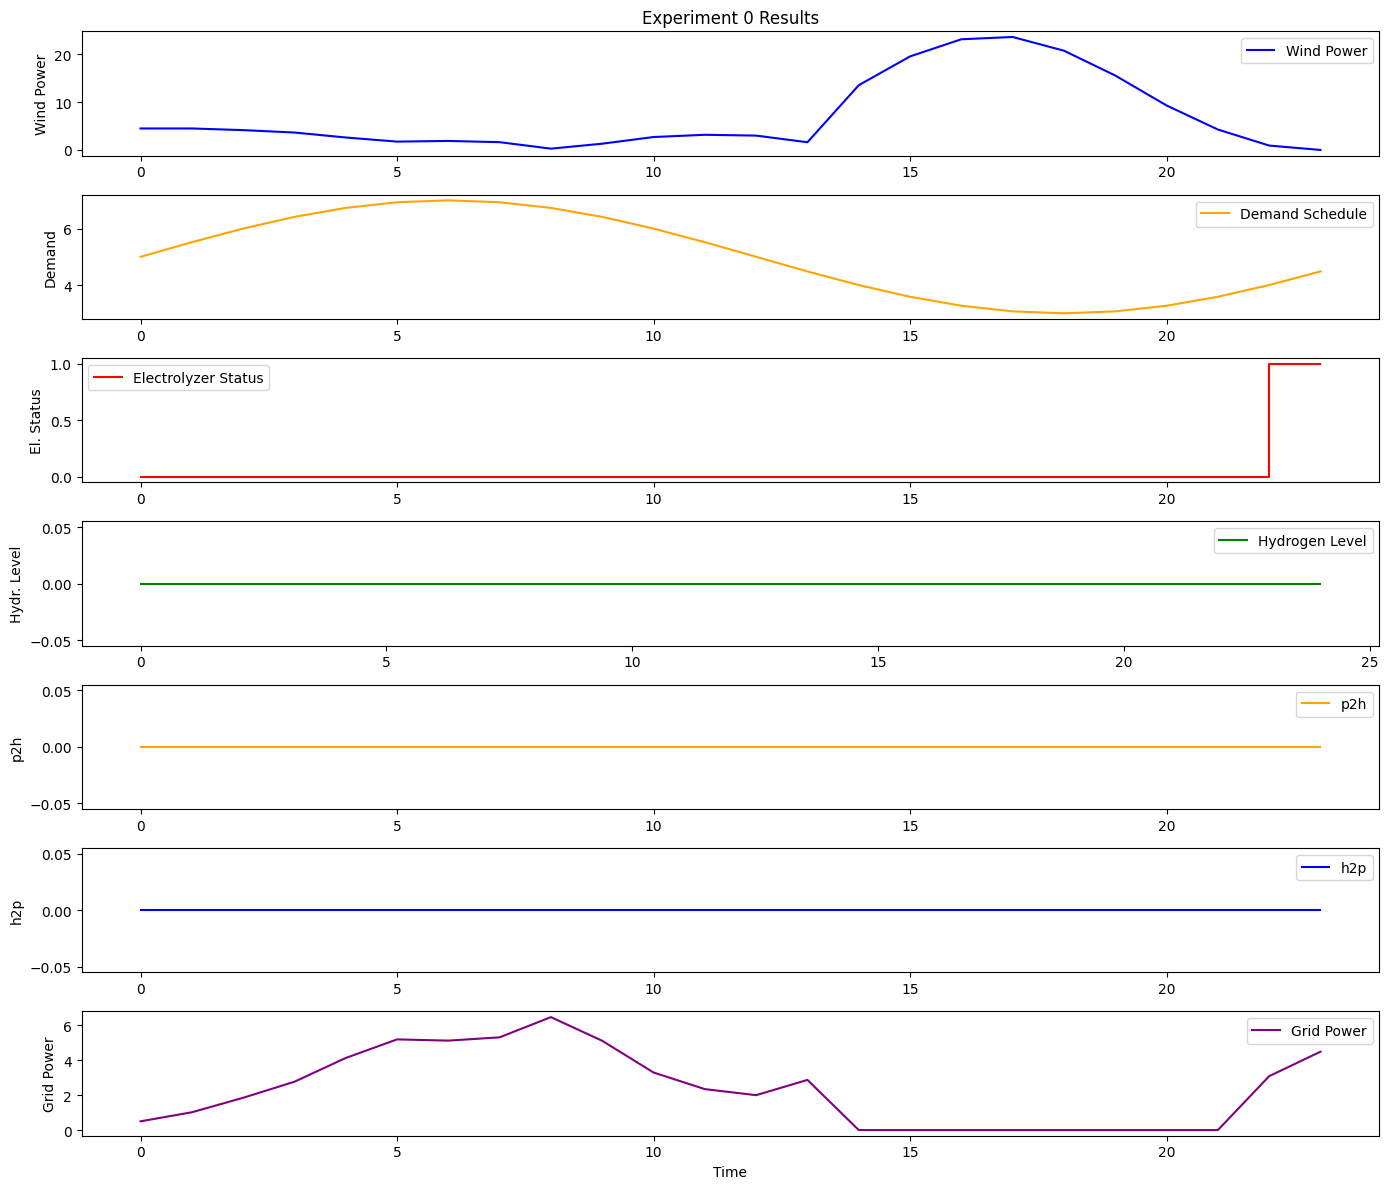

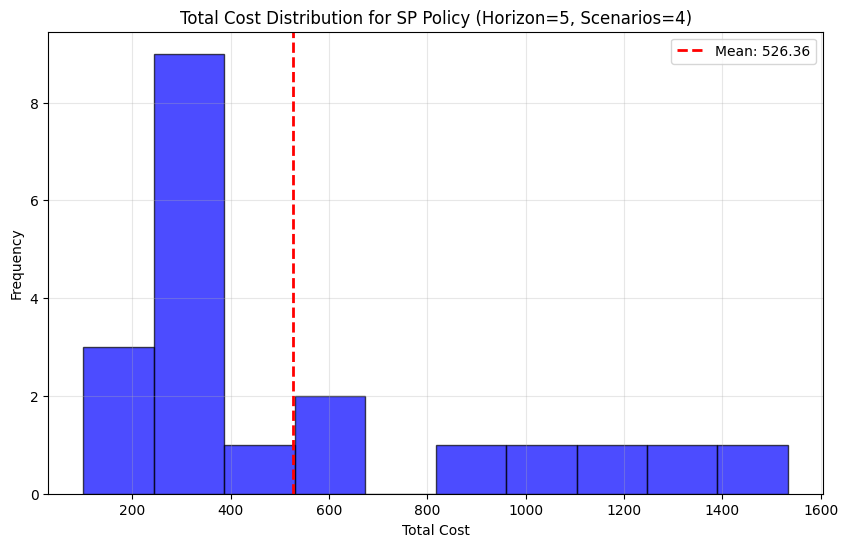


Generating comparison across all policies...


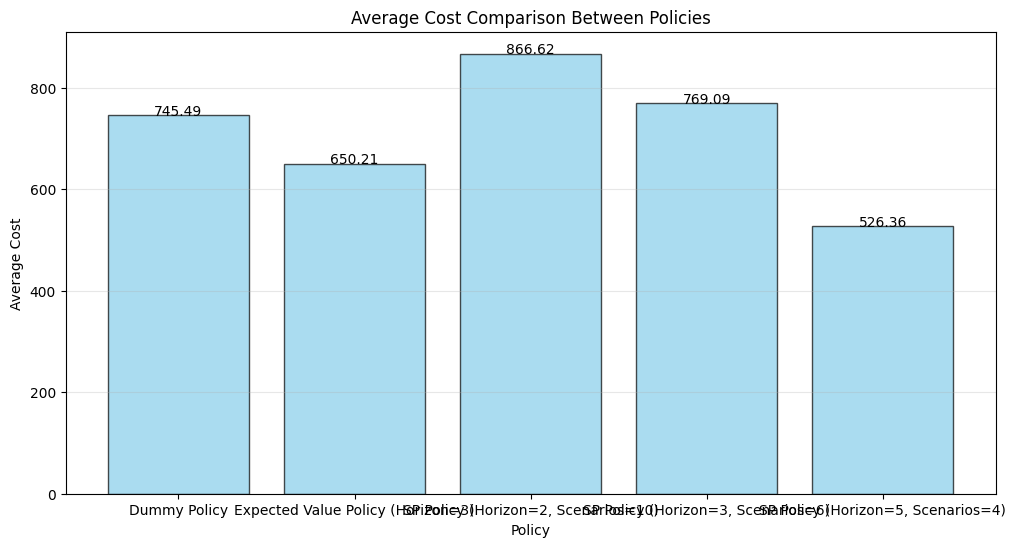


Task 2 evaluation completed successfully!


In [ ]:
# Import framework components
from task_2.helper_functions import (
    sp_policy_short_horizon,
    sp_policy_medium,
    sp_policy_long_horizon,
    ev_policy
)

def main():
    """
    Main function to run Task 2 evaluation.
    """
    data = get_fixed_data()
    
    print("=" * 70)
    print("TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT")
    print("=" * 70)
    
    # Number of experiments to run for each policy
    num_experiments = 20
    
    # Dictionary to store results for all policies
    policy_results = {}
    
    # Define the policies to evaluate
    policies = {
        "Dummy Policy": dummy_policy,
        "Expected Value Policy (Horizon=3)": ev_policy,
        "SP Policy (Horizon=2, Scenarios=10)": sp_policy_short_horizon,
        "SP Policy (Horizon=3, Scenarios=6)": sp_policy_medium,
        "SP Policy (Horizon=5, Scenarios=4)": sp_policy_long_horizon,
    }
    
    # Evaluate each policy
    for policy_name, policy_func in policies.items():
        print(f"\n{'-' * 50}")
        print(f"Evaluating: {policy_name}")
        print(f"{'-' * 50}")
        
        start_time = time.time()
        
        try:
            # Run the policy evaluation
            avg_cost, results = evaluate_policy(
                policy_func, 
                num_experiments=num_experiments,
                verbose=True
            )
            
            elapsed_time = time.time() - start_time
            
            # Print summary statistics
            print(f"\nResults for {policy_name}:")
            print(f"Average Cost: {avg_cost:.2f}")
            print(f"Min Cost: {np.min(results['total_costs']):.2f}")
            print(f"Max Cost: {np.max(results['total_costs']):.2f}")
            print(f"Standard Deviation: {np.std(results['total_costs']):.2f}")
            print(f"Evaluation Time: {elapsed_time:.2f} seconds")
            
            # Store the results for comparison
            policy_results[policy_name] = results
            
        except Exception as e:
            print(f"Error evaluating {policy_name}: {e}")
    
    # Generate visualizations if results are available
    if policy_results:
        print("\nGenerating visualizations...")
        
        # Generate individual policy visualizations
        for policy_name, results in policy_results.items():
            print(f"\nVisualizing results for {policy_name}...")
            
            # Plot results for a single experiment
            plot_experiment_results(results, experiment_index=0, data=data)
            
            # Plot histogram of costs across all experiments
            plot_cost_histogram(results, policy_name=policy_name)
        
        # Compare all policies if we have more than one
        if len(policy_results) > 1:
            print("\nGenerating comparison across all policies...")
            compare_policies(policy_results)
        
        print("\nTask 2 evaluation completed successfully!")
        
        # Return the results dictionary for further analysis if needed
        return policy_results
    else
        print("\nNo policy evaluation results available.")
        return None

if __name__ == "__main__":
    main():

# Task 3: ADP

TASK 3: APPROXIMATE DYNAMIC PROGRAMMING FOR ENERGY HUB MANAGEMENT

Step 1: Training Value Function Approximation...
Starting VFA training...
Number of time periods: 24
Number of state samples per period: 10
Number of next state samples: 5
Time period 22
  Processing sampled state: (3.0530645795484457, 4.590420795032002, 5.97089760748544, np.int64(1))
  Updated theta: [ 0.18854652  0.11085195  0.07205586 -0.15503637  0.08822735 -0.00798944]
Time period 21
  Processing sampled state: (39.71487890029031, 9.357287382340235, 4.10319189274725, np.int64(0))
  Updated theta: [ 0.19697154  0.08616844 -0.20456827  0.12801389 -0.15481791 -0.01000766]
Time period 20
  Processing sampled state: (23.957872992648184, 4.16473208884954, 12.429822578829052, np.int64(0))
  Updated theta: [ 0.66462508  0.15755627 -0.21658626  0.69188743 -0.02191795 -0.02185965]
Time period 19
  Processing sampled state: (29.753505868685625, 6.178157650710908, 13.57880014437065, np.int64(0))
  Updated theta: [ 0.62599298 -

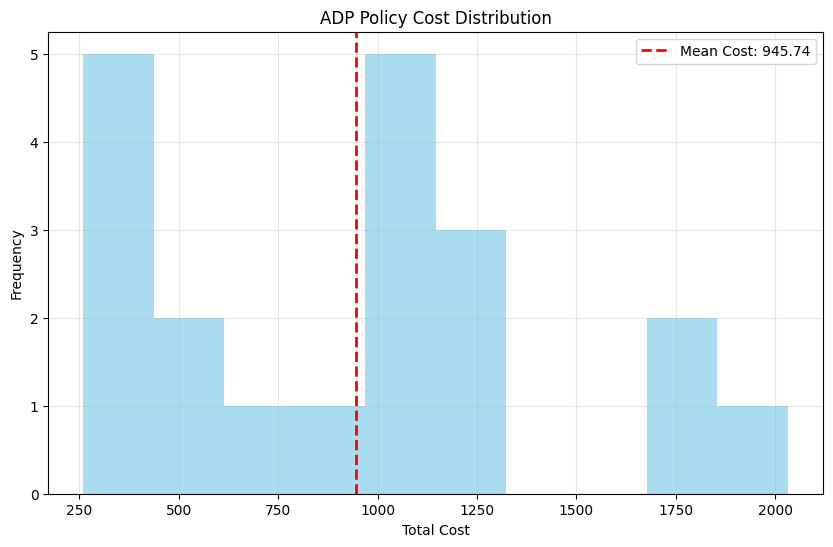

In [ ]:
# Import required modules
import time
from utils.data import get_fixed_data
from task_1.evaluation_framework import evaluate_policy
from task_1.energy_hub_policies import dummy_policy
from task_3.task3_3 import train_vfa, create_adp_policy
# Import stochastic programming policies
from task_2.helper_functions import (
    sp_policy_short_horizon,
    sp_policy_medium,
    sp_policy_long_horizon,
    ev_policy
)

def main():
    """
    Main function to run Task 3 evaluation.
    """
    data = get_fixed_data()
    
    print("=" * 70)
    print("TASK 3: APPROXIMATE DYNAMIC PROGRAMMING FOR ENERGY HUB MANAGEMENT")
    print("=" * 70)
    
    # Number of experiments to run for each policy
    num_experiments = 20
    
    # Dictionary to store results for all policies
    policy_results = {}
    
    # Define the policies to evaluate
    policies = {
        "Dummy Policy": dummy_policy,
        "ADP Policy": create_adp_policy
    }
    
    # Step 1: Train the Value Function Approximation
    print("\nStep 1: Training Value Function Approximation...")
    training_start = time.time()
    
    # Train with more samples for better results
    theta = train_vfa(
        data,
        num_state_samples=10,  # Number of state samples per time period
        num_next_states=5,     # Number of next states for expectation
        discount_factor=0.95,
        num_theta_candidates=15,
        verbose=True
    )
    
    training_time = time.time() - training_start
    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Trained theta parameter: {theta}")
    
    # Step 2: Analyze the trained value function
    print("\nStep 2: Analyzing value function approximation...")
    
    # Calculate feature importance
    #calculate_feature_importance(theta)
    
    # Generate value function heatmap
    #generate_value_function_heatmap(theta, data)
    
    # Step 3: Create ADP policy using trained theta
    print("\nStep 3: Creating ADP policy with trained parameters...")
    adp_policy = create_adp_policy(theta)
    
    # Step 4: Evaluate the policy using the evaluation framework
    print("\nStep 4: Evaluating ADP policy...")
    evaluation_start = time.time()
    start_time = time.time()
    
    avg_cost, results = evaluate_policy(
        adp_policy,
        num_experiments=num_experiments,
        verbose=True
    )
    
    evaluation_time = time.time() - evaluation_start
    
    # Print summary statistics
    print("\nEvaluation Results:")
    print(f"Average Cost: {avg_cost:.2f}")
    print(f"Min Cost: {np.min(results['total_costs']):.2f}")
    print(f"Max Cost: {np.max(results['total_costs']):.2f}")
    print(f"Standard Deviation: {np.std(results['total_costs']):.2f}")
    print(f"Evaluation Time: {evaluation_time:.2f} seconds")
    
    # Step 5: Visualize policy decisions
    #print("\nStep 5: Visualizing policy decisions...")
    #visualize_policy_decisions(results)
    
    # Generate cost histogram
    plt.figure(figsize=(10, 6))
    plt.hist(results['total_costs'], bins=10, alpha=0.7, color='skyblue')
    plt.axvline(avg_cost, color='red', linestyle='dashed', linewidth=2, 
                label=f'Mean Cost: {avg_cost:.2f}')
    plt.title('ADP Policy Cost Distribution')
    plt.xlabel('Total Cost')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('adp_cost_histogram.png')
    
    total_time = time.time() - start_time
    print(f"\nTotal execution time: {total_time:.2f} seconds")
    print("\nADP evaluation completed successfully!")
    
    # Return results for further analysis if needed
    return {
        'theta': theta,
        'avg_cost': avg_cost,
        'results': results
    }


if __name__ == "__main__":
    main()

# Task 3 new

In [ ]:
#!/usr/bin/env python
"""
Master script for Task 3: Approximate Dynamic Programming for Energy Hub Management.
"""

import numpy as np
import time

# Import required modules
from utils.data import get_fixed_data

# Import framework components
from task_1.evaluation_framework import evaluate_policy
from task_1.energy_hub_policies import dummy_policy
from task_2.helper_functions import sp_policy_long_horizon

# Import ADP implementation
from task_3.task3_4 import create_adp_policy

# Import visualization functions
from task_3.task3_visualization import (
    plot_experiment_results,
    plot_cost_histogram,
    compare_policies,
    plot_feature_importance
)

def main():
    """
    Main function to run ADP evaluation.
    """
    data = get_fixed_data()
    
    print("=" * 70)
    print("TASK 3: APPROXIMATE DYNAMIC PROGRAMMING FOR ENERGY HUB MANAGEMENT")
    print("=" * 70)
    
    # Number of experiments to run for each policy
    num_experiments = 20
    
    # Dictionary to store results for all policies
    policy_results = {}
    
    # Define the policies to evaluate
    policies = {
            "Dummy Policy": dummy_policy,
            "SP Policy (Horizon=5, Scenarios=4)": sp_policy_long_horizon,
            "ADP Policy": create_adp_policy()  # This should work with no arguments
                }
    
    # Evaluate each policy
    for policy_name, policy_func in policies.items():
        print(f"\n{'-' * 50}")
        print(f"Evaluating: {policy_name}")
        print(f"{'-' * 50}")
        
        start_time = time.time()
        
        try:
            # Run the policy evaluation
            avg_cost, results = evaluate_policy(
                policy_func,
                num_experiments=num_experiments,
                verbose=True
            )
            
            elapsed_time = time.time() - start_time
            
            # Print summary statistics
            print(f"\nResults for {policy_name}:")
            print(f"Average Cost: {avg_cost:.2f}")
            print(f"Min Cost: {np.min(results['total_costs']):.2f}")
            print(f"Max Cost: {np.max(results['total_costs']):.2f}")
            print(f"Standard Deviation: {np.std(results['total_costs']):.2f}")
            print(f"Evaluation Time: {elapsed_time:.2f} seconds")
            
            # Store the results for comparison
            policy_results[policy_name] = results
            
        except Exception as e:
            print(f"Error evaluating {policy_name}: {e}")
    
    # Generate visualizations if results are available
    if policy_results:
        print("\nGenerating visualizations...")
        
        # Generate individual policy visualizations
        for policy_name, results in policy_results.items():
            print(f"\nVisualizing results for {policy_name}...")
            
            # Plot results for a single experiment
            plot_experiment_results(results, experiment_index=0, data=data)
            
            # Plot histogram of costs across all experiments
            plot_cost_histogram(results, policy_name=policy_name)
        
        # Compare all policies if we have more than one
        if len(policy_results) > 1:
            print("\nGenerating comparison across all policies...")
            compare_policies(policy_results)
        
        print("\nTask 3 evaluation completed successfully!")
        
        # Return the results dictionary for further analysis if needed
        return policy_results
    else:
        print("\nNo policy evaluation results available.")
        return None


if __name__ == "__main__":
    main()

TASK 3: APPROXIMATE DYNAMIC PROGRAMMING FOR ENERGY HUB MANAGEMENT


TypeError: create_adp_policy() missing 1 required positional argument: 'theta'

In [22]:
from task_3.task3_4 import create_adp_policy

def main():
    # Create the ADP policy function - this should require no arguments
    policy_func = create_adp_policy()
    
    # Print the policy function to verify it was created correctly
    print("Created policy function:", policy_func)
    print("Policy function type:", type(policy_func))
    
    print("\nTest completed successfully!")

if __name__ == "__main__":
    main()

Created policy function: <function adp_policy at 0x121729580>
Policy function type: <class 'function'>

Test completed successfully!
